In [53]:
import pandas as pd
import numpy as np
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
from sklearn.model_selection import train_test_split

In [73]:
con = psycopg2.connect(
    host = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
    database = 'mid_term_project',
    user = 'lhl_student',
    password = 'lhl_student',
    port = 5432
)
sql_flight_info = "SELECT fl_date, mkt_unique_carrier, op_unique_carrier, op_carrier_fl_num, origin, dep_time, crs_dep_time, dep_delay, dest, arr_time, arr_delay, crs_arr_time, actual_elapsed_time, crs_elapsed_time, distance, carrier_delay, weather_delay, nas_delay, security_delay, late_aircraft_delay FROM flights WHERE (origin = 'ORD' or origin = 'ATL' or origin = 'DFW' or origin = 'DEN' or origin = 'LAX' or origin = 'CLT' or origin = 'SEA' or origin = 'SFO' or origin = 'EWR' or origin = 'PHX' or origin = 'LGA' or origin = 'IAH' or origin = 'LAS' or origin = 'BOS' or origin = 'PHL' or origin = 'MCO' or origin = 'DTW' or origin = 'MSP' or origin = 'DCA') or (dest = 'ORD' or dest = 'ATL' or dest = 'DFW' or dest = 'DEN' or dest = 'LAX' or dest = 'CLT' or dest = 'SEA' or dest = 'SFO' or dest = 'EWR' or dest = 'PHX' or dest = 'LGA' or dest = 'IAH' or dest = 'LAS' or dest = 'BOS' or dest = 'PHL' or dest = 'MCO' or dest = 'DTW' or dest = 'MSP' or dest = 'DCA') ORDER BY RANDOM() LIMIT 1000000;"
data_flight_info = pd.read_sql_query(sql_flight_info,con)
con.close()

In [74]:
#data_flight_info.to_csv('training_data_01.csv', encoding='utf-8', index=False)

In [75]:
#data_flight_info = pd.read_csv('/Users/craiglynch/Desktop/Lighthouse_Labs/Mid-term_Project/mid-term-project-I-master/training_data_01.csv', sep = ',')

In [79]:
# Creating a function which will remove extra leading 
# and tailing whitespace from the data.
# pass dataframe as a parameter here

def whitespace_remover(dataframe):
    
    # iterating over the columns
    for i in dataframe.columns:
          
        # checking datatype of each columns
        if dataframe[i].dtype == 'object':
              
            # applying strip function on column
            dataframe[i] = dataframe[i].map(str.strip)
        else:
              
            # if condn. is False then it will do nothing.
            pass

In [80]:
df_flight_info = data_flight_info.copy()
whitespace_remover(df_flight_info)
df_flight_info.head()

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,dep_time,crs_dep_time,dep_delay,dest,arr_time,arr_delay,crs_arr_time,actual_elapsed_time,crs_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-10-19,NK,NK,169,IAH,1433.0,1435,-2.0,LAS,1552.0,2.0,1550,199.0,195.0,1222.0,NaN,NaN,NaN,NaN,NaN
1,2018-11-19,AA,MQ,3509,XNA,2000.0,2006,-6.0,DFW,2140.0,9.0,2131,100.0,85.0,280.0,NaN,NaN,NaN,NaN,NaN
2,2019-12-16,DL,DL,2323,MCO,605.0,605,0.0,LAX,849.0,8.0,841,344.0,336.0,2218.0,NaN,NaN,NaN,NaN,NaN
3,2018-01-16,UA,ZW,3837,ORD,1349.0,1345,4.0,HPN,1659.0,3.0,1656,130.0,131.0,738.0,NaN,NaN,NaN,NaN,NaN
4,2019-03-06,AA,OH,5196,CLT,1751.0,1750,1.0,OAJ,1844.0,-2.0,1846,53.0,56.0,191.0,NaN,NaN,NaN,NaN,NaN


In [81]:
# Creating year, month, date columns
# Create new columns
df_flight_info['year'] = pd.DatetimeIndex(df_flight_info['fl_date']).year
df_flight_info['month'] = pd.DatetimeIndex(df_flight_info['fl_date']).month
df_flight_info['day'] = pd.DatetimeIndex(df_flight_info['fl_date']).day
df_flight_info['weekday'] = ((pd.DatetimeIndex(df_flight_info['fl_date']).dayofweek) // 5 == 1).astype(float)
df_flight_info.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
op_unique_carrier           0
op_carrier_fl_num           0
origin                      0
dep_time                16676
crs_dep_time                0
dep_delay               16986
dest                        0
arr_time                17688
arr_delay               20023
crs_arr_time                0
actual_elapsed_time     19860
crs_elapsed_time            2
distance                    0
carrier_delay          805894
weather_delay          805894
nas_delay              805894
security_delay         805894
late_aircraft_delay    805894
year                        0
month                       0
day                         0
weekday                     0
dtype: int64

In [82]:
# Filling all NaN delay info with 0
df_flight_info[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']] = df_flight_info[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].fillna(0)

In [83]:
# Because dep_time, dep_delay, arr_time, arr_delay, and actual_elapsed_time have relatively small amounts of NaN they were dropped
df_flight_info = df_flight_info.dropna()

In [84]:
df_flight_info.isnull().sum()

fl_date                0
mkt_unique_carrier     0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
dep_time               0
crs_dep_time           0
dep_delay              0
dest                   0
arr_time               0
arr_delay              0
crs_arr_time           0
actual_elapsed_time    0
crs_elapsed_time       0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
year                   0
month                  0
day                    0
weekday                0
dtype: int64

In [85]:
# 20,494 rows removed
df_flight_info.shape

(979691, 24)

In [86]:
df_flight_info1 = df_flight_info[(df_flight_info['carrier_delay'] <= 720) & (df_flight_info['carrier_delay'] >= -180)]
df_flight_info2 = df_flight_info1[(df_flight_info1['weather_delay'] <= 720) & (df_flight_info['weather_delay'] >= -180)]
df_flight_info3 = df_flight_info2[(df_flight_info2['nas_delay'] <= 720) & (df_flight_info['nas_delay'] >= -180)]
df_flight_info4 = df_flight_info3[(df_flight_info3['security_delay'] <= 720) & (df_flight_info['security_delay'] >= -180)]
df_flight_info = df_flight_info4[(df_flight_info4['late_aircraft_delay'] <= 720) & (df_flight_info['late_aircraft_delay'] >= -180)]
df_flight_info = df_flight_info[(df_flight_info['arr_delay'] <= 720) & (df_flight_info['arr_delay'] >= -180)]
df_flight_info = df_flight_info[(df_flight_info['dep_delay'] <= 720) & (df_flight_info['dep_delay'] >= -180)]
df_flight_info = df_flight_info[(df_flight_info['crs_elapsed_time'] <= 960) & (df_flight_info['crs_elapsed_time'] >= 0)]


<ipython-input-86-9487a5b30096>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flight_info2 = df_flight_info1[(df_flight_info1['weather_delay'] <= 720) & (df_flight_info['weather_delay'] >= -180)]
<ipython-input-86-9487a5b30096>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flight_info3 = df_flight_info2[(df_flight_info2['nas_delay'] <= 720) & (df_flight_info['nas_delay'] >= -180)]
<ipython-input-86-9487a5b30096>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flight_info4 = df_flight_info3[(df_flight_info3['security_delay'] <= 720) & (df_flight_info['security_delay'] >= -180)]
<ipython-input-86-9487a5b30096>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_flight_info = df_flight_info4[(df_flight_info4['late_aircraft_delay'] <= 720) & (df_flight_info['late_aircraft_delay'] >= -180)]


In [87]:
#df_flight_info.to_csv('cleaned_training_data_01.csv', encoding='utf-8', index=False)

In [88]:
df_flight_info.isnull().sum()

fl_date                0
mkt_unique_carrier     0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
dep_time               0
crs_dep_time           0
dep_delay              0
dest                   0
arr_time               0
arr_delay              0
crs_arr_time           0
actual_elapsed_time    0
crs_elapsed_time       0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
year                   0
month                  0
day                    0
weekday                0
dtype: int64

In [89]:
# Getting Average Flight Delay
flights_grouped = df_flight_info.groupby(by='op_unique_carrier').mean()
flights_grouped.reset_index(inplace=True)
flights_grouped['total_carrier_delay'] = flights_grouped['carrier_delay'] + flights_grouped['late_aircraft_delay']
flights_grouped = flights_grouped.drop(columns = ['op_carrier_fl_num','crs_dep_time','crs_elapsed_time','dep_delay','arr_delay','dep_time','arr_time','crs_arr_time','actual_elapsed_time','distance','carrier_delay','nas_delay','security_delay','late_aircraft_delay','weather_delay','year','month','day','weekday'])
flights_grouped

,op_unique_carrier,total_carrier_delay
0,9E,8.683137
1,AA,9.123126
2,AS,5.640101
3,AX,16.654547
4,B6,14.665643
5,C5,20.790500
6,CP,9.953007
7,DL,5.691203
8,EV,11.124394
9,F9,14.752196


In [90]:
#Merge averages dataframes with original 
df_flight_info = df_flight_info.merge(flights_grouped, on = 'op_unique_carrier', how = 'outer')
df_flight_info.sort_values(by='fl_date')

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,dep_time,crs_dep_time,dep_delay,dest,arr_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,month,day,weekday,total_carrier_delay
631937,2018-01-01,WN,WN,1683,SLC,2141.0,2055,46.0,LAS,2146.0,...,0.0,0.0,0.0,0.0,31.0,2018,1,1,0.0,8.157653
477102,2018-01-01,AA,AA,1094,DFW,906.0,910,-4.0,BOS,1332.0,...,0.0,0.0,0.0,0.0,0.0,2018,1,1,0.0,9.123126
839270,2018-01-01,UA,YX,3707,EWR,2030.0,2025,5.0,CLT,2225.0,...,0.0,0.0,0.0,0.0,0.0,2018,1,1,0.0,7.475844
582442,2018-01-01,WN,WN,5716,MCI,1727.0,1725,2.0,MCO,2057.0,...,0.0,0.0,0.0,0.0,0.0,2018,1,1,0.0,8.157653
976923,2018-01-01,VX,VX,1954,SFO,1330.0,1225,65.0,SAN,1455.0,...,62.0,0.0,0.0,0.0,0.0,2018,1,1,0.0,5.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650911,2019-12-31,UA,OO,5987,SLC,1146.0,1148,-2.0,LAX,1232.0,...,0.0,0.0,0.0,0.0,0.0,2019,12,31,0.0,10.389559
369397,2019-12-31,DL,9E,4902,TYS,949.0,956,-7.0,ATL,1039.0,...,0.0,0.0,0.0,0.0,0.0,2019,12,31,0.0,8.683137
468763,2019-12-31,AA,AA,979,CLT,932.0,920,12.0,PHX,1214.0,...,0.0,0.0,0.0,0.0,0.0,2019,12,31,0.0,9.123126
145216,2019-12-31,DL,DL,2048,MCO,1658.0,1655,3.0,ATL,1819.0,...,0.0,0.0,0.0,0.0,0.0,2019,12,31,0.0,5.691203


(-100.0, 400.0)

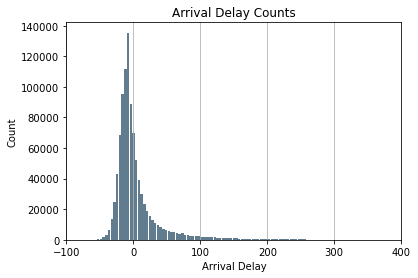

In [91]:
# Generate data on commute times.
size, scale = 50, 100


df_flight_info['arr_delay'].plot.hist(grid=True, bins=200, rwidth=0.9,
                   color='#607c8e')
plt.title('Arrival Delay Counts')
plt.xlabel('Arrival Delay')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.xlim(xmin=-100, xmax = 400)

## Creating a baseline model

In [92]:
X_base = df_flight_info[['crs_dep_time','crs_arr_time','crs_elapsed_time','distance','year','month','day','weekday','total_carrier_delay']]
y_base = df_flight_info['arr_delay']

In [93]:
X_base

,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,year,month,day,weekday,total_carrier_delay
0,1435,1550,195.0,1222.0,2018,10,19,0.0,5.841662
1,1435,1550,195.0,1222.0,2018,9,24,0.0,5.841662
2,2100,502,302.0,2329.0,2018,3,21,0.0,5.841662
3,1822,2035,193.0,1124.0,2018,4,24,0.0,5.841662
4,2105,502,297.0,2343.0,2018,4,22,1.0,5.841662
...,...,...,...,...,...,...,...,...,...
978881,1500,2345,345.0,2762.0,2019,8,8,0.0,8.817211
978882,1325,2200,335.0,2677.0,2018,3,12,0.0,8.817211
978883,1315,2130,315.0,2398.0,2019,7,14,1.0,8.817211
978884,1510,2355,345.0,2762.0,2018,10,26,0.0,8.817211


In [94]:
X_base.shape

(978886, 9)

In [95]:
# Split dataset into training set and test set
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3) # 70% training and 30% test

# Model Training

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, r2_score, f1_score
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

## Baseline Model: Random Forest

In [97]:
#Create a Gaussian Regressor
clf_base=RandomForestRegressor(n_estimators=100)
#Train the model using the training sets 
clf_base.fit(X_train_base,y_train_base)

RandomForestRegressor()

In [98]:
y_pred_base=clf_base.predict(X_test_base)

In [99]:
print('Model RMSE is: ',np.sqrt(mean_squared_error(y_test_base, y_pred_base)))
print('Model R2 Score is: ',r2_score(y_test_base,y_pred_base))

Model RMSE is:  44.384880622720665
Model R2 Score is:  -0.011981169675816083


In [100]:
df_flight_info.to_csv('data_for_model_iterations_03.csv', encoding='utf-8', index=False)